In [1]:
#Installing few packages used in notebook 
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install pandas_profiling
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install bubbly

In [2]:
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling # For data profiling
import missingno as msno # For checking null values in data
import seaborn as sns # For data viz
import missingno as msno # For checking missing values 

# For advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot
import plotly.express as px

%matplotlib inline

In [3]:
# Reading dataset
data_v1=pd.read_csv('../Dataset/heart.csv')

In [4]:
# Top 5 rows
data_v1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Changing the column names to have a clear understanding of features
data_v1.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Cholesterol', 'Fasting_Blood_Sugar', 
                   'Resting_ECG', 'Max_Heart_Rate_Achieved','Exercise_Induced_Angina', 'St_Depression',
                   'St_Slope', 'Num_Major_Vessels', 'Thalassemia', 'Target']

In [6]:
# Changing features into corresponding categories for better interpretation
#data_v1['Sex'][data_v1['Sex'] == 0] = 'female'
#data_v1['Sex'][data_v1['Sex'] == 1] = 'male'

data_v1['Chest_Pain_Type'][data_v1['Chest_Pain_Type'] == 1] = 'typical angina'
data_v1['Chest_Pain_Type'][data_v1['Chest_Pain_Type'] == 2] = 'atypical angina'
data_v1['Chest_Pain_Type'][data_v1['Chest_Pain_Type'] == 3] = 'non-anginal pain'
data_v1['Chest_Pain_Type'][data_v1['Chest_Pain_Type'] == 4] = 'asymptomatic'

data_v1['Fasting_Blood_Sugar'][data_v1['Fasting_Blood_Sugar'] == 0] = 'lower than 120mg/ml'
data_v1['Fasting_Blood_Sugar'][data_v1['Fasting_Blood_Sugar'] == 1] = 'greater than 120mg/ml'

data_v1['Resting_ECG'][data_v1['Resting_ECG'] == 0] = 'normal'
data_v1['Resting_ECG'][data_v1['Resting_ECG'] == 1] = 'ST-T wave abnormality'
data_v1['Resting_ECG'][data_v1['Resting_ECG'] == 2] = 'left ventricular hypertrophy'

data_v1['Exercise_Induced_Angina'][data_v1['Exercise_Induced_Angina'] == 0] = 'no'
data_v1['Exercise_Induced_Angina'][data_v1['Exercise_Induced_Angina'] == 1] = 'yes'

data_v1['St_Slope'][data_v1['St_Slope'] == 1] = 'upsloping'
data_v1['St_Slope'][data_v1['St_Slope'] == 2] = 'flat'
data_v1['St_Slope'][data_v1['St_Slope'] == 3] = 'downsloping'

data_v1['Thalassemia'][data_v1['Thalassemia'] == 1] = 'normal'
data_v1['Thalassemia'][data_v1['Thalassemia'] == 2] = 'fixed defect'
data_v1['Thalassemia'][data_v1['Thalassemia'] == 3] = 'reversable defect'

In [7]:
# Checking new feature values
data_v1.head(10)

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,St_Depression,St_Slope,Num_Major_Vessels,Thalassemia,Target
0,63,1,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,1,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,0,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,1,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,0,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
5,57,1,0,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,upsloping,0,normal,1
6,56,0,typical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,1
7,44,1,typical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,0,reversable defect,1
8,52,1,atypical angina,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,flat,0,reversable defect,1
9,57,1,atypical angina,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,flat,0,fixed defect,1


In [8]:
# Checking datatypes of all features 
data_v1.dtypes

Age                          int64
Sex                          int64
Chest_Pain_Type             object
Resting_Blood_Pressure       int64
Cholesterol                  int64
Fasting_Blood_Sugar         object
Resting_ECG                 object
Max_Heart_Rate_Achieved      int64
Exercise_Induced_Angina     object
St_Depression              float64
St_Slope                    object
Num_Major_Vessels            int64
Thalassemia                 object
Target                       int64
dtype: object

In [9]:
# Checking data for null values
data_v1.isnull().any()

Age                        False
Sex                        False
Chest_Pain_Type            False
Resting_Blood_Pressure     False
Cholesterol                False
Fasting_Blood_Sugar        False
Resting_ECG                False
Max_Heart_Rate_Achieved    False
Exercise_Induced_Angina    False
St_Depression              False
St_Slope                   False
Num_Major_Vessels          False
Thalassemia                False
Target                     False
dtype: bool

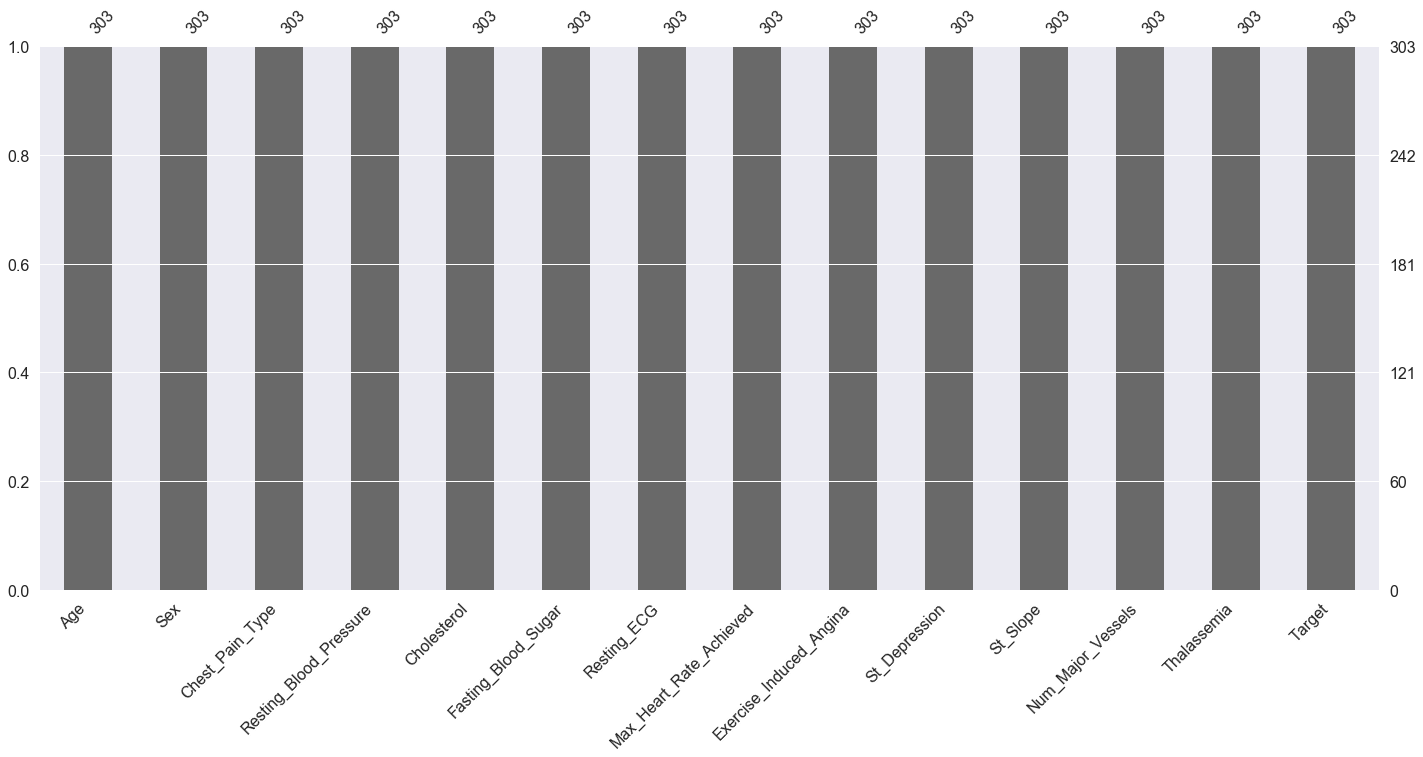

In [10]:
# Another way to check null values using data viz
p=msno.bar(data_v1)

In [11]:
# Now checking for duplicates and removing them (if any)
data_v1[data_v1.duplicated() == True]

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,St_Depression,St_Slope,Num_Major_Vessels,Thalassemia,Target
164,38,1,atypical angina,138,175,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,4,fixed defect,1


In [12]:
# Removed the duplicate row
data_v1.drop_duplicates(inplace = True)
data_v1[data_v1.duplicated() == True]

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,St_Depression,St_Slope,Num_Major_Vessels,Thalassemia,Target


In [13]:
# Getting Dataset's Basic Info
data_v1.describe()

,Age,Sex,Resting_Blood_Pressure,Cholesterol,Max_Heart_Rate_Achieved,St_Depression,Num_Major_Vessels,Target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,131.602649,246.500000,149.569536,1.043046,0.718543,0.543046
std,9.04797,0.466426,17.563394,51.753489,22.903527,1.161452,1.006748,0.498970
min,29.00000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,152.500000,0.800000,0.000000,1.000000
75%,61.00000,1.000000,140.000000,274.750000,166.000000,1.600000,1.000000,1.000000
max,77.00000,1.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [14]:
# Getting Dataset's Basic Info
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
Age                        302 non-null int64
Sex                        302 non-null int64
Chest_Pain_Type            302 non-null object
Resting_Blood_Pressure     302 non-null int64
Cholesterol                302 non-null int64
Fasting_Blood_Sugar        302 non-null object
Resting_ECG                302 non-null object
Max_Heart_Rate_Achieved    302 non-null int64
Exercise_Induced_Angina    302 non-null object
St_Depression              302 non-null float64
St_Slope                   302 non-null object
Num_Major_Vessels          302 non-null int64
Thalassemia                302 non-null object
Target                     302 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 35.4+ KB


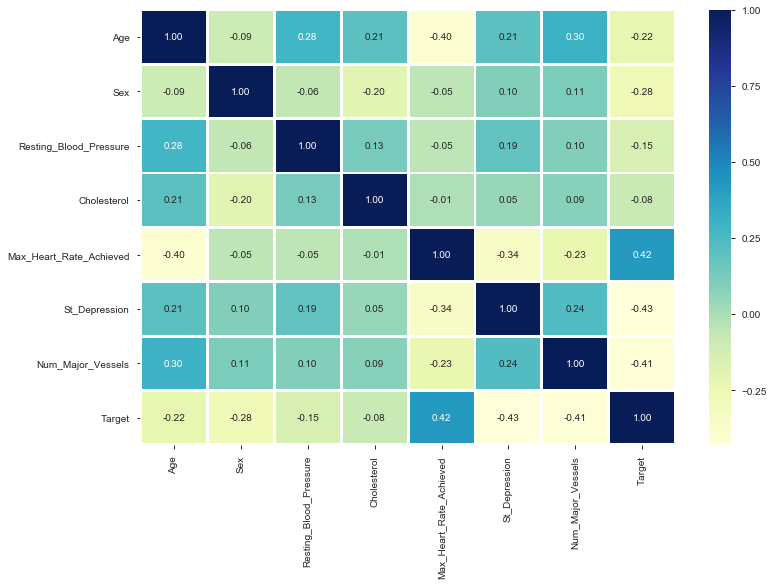

In [15]:
# Checking correlation among variables
plt.figure(figsize=(12,8))
sns.heatmap(data_v1.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)

In [16]:
# Data Profiling
profile = pandas_profiling.ProfileReport(data_v1)
profile

In [33]:
#The below Pie chart shows us the distribution of Gender in the Heart diseases.
#It shows that in our dataset 68% of the patients are men whereas only 32% are women.

import plotly.graph_objects as go
labels = ['Male','Female']
values = data_v1['Sex'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(autosize=False,width=500,height=500)
fig.show()

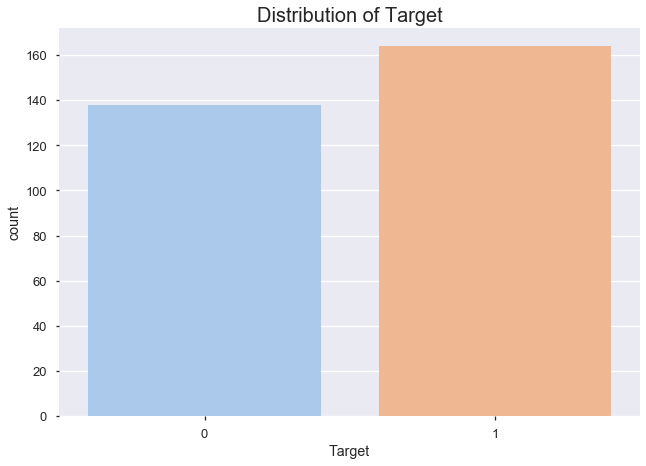

In [35]:
# The dataset is quite balanced with almost equal no. of Positive and Negative Classes. 
#Let's say the Positive Class says that the patient is suffering from the disease and 
#the Negative class says that the patient is not suffering from the disease.

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data_v1['Target'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

In [36]:
'''
# How many people are suffering from Heart Disease ?
f,ax=plt.subplots(1,2,figsize=(14,6))
data_v1['Target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Target')
ax[0].set_xlabel("Disease Percentage \n 0-> Healthy  1-> Diseased")
ax[0].set_ylabel('')
sns.countplot('Target',data=data_v1,ax=ax[1])
ax[1].set_title('Target')
ax[1].set_xlabel("Disease Count \n 0-> Healthy  1-> Diseased")
plt.show()
'''

'\n# How many people are suffering from Heart Disease ?\nf,ax=plt.subplots(1,2,figsize=(14,6))\ndata_v1[\'Target\'].value_counts().plot.pie(explode=[0,0.1],autopct=\'%1.1f%%\',ax=ax[0],shadow=False)\nax[0].set_title(\'Target\')\nax[0].set_xlabel("Disease Percentage \n 0-> Healthy  1-> Diseased")\nax[0].set_ylabel(\'\')\nsns.countplot(\'Target\',data=data_v1,ax=ax[1])\nax[1].set_title(\'Target\')\nax[1].set_xlabel("Disease Count \n 0-> Healthy  1-> Diseased")\nplt.show()\n'

In [37]:
'''
#a)->SEX (Category)
f,ax=plt.subplots(1,2,figsize=(14,6))
data_v1['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Gender')
ax[0].set_xlabel("Gender Percentage \n 0-> Female  1-> Male")
ax[0].set_ylabel('')
sns.countplot('Sex',data=data_v1,ax=ax[1])
ax[1].set_title('Gender')
ax[1].set_xlabel("Gender Count \n 0-> Female  1-> Male")
plt.show()
'''

'\n#a)->SEX (Category)\nf,ax=plt.subplots(1,2,figsize=(14,6))\ndata_v1[\'Sex\'].value_counts().plot.pie(explode=[0,0.1],autopct=\'%1.1f%%\',ax=ax[0],shadow=False)\nax[0].set_title(\'Gender\')\nax[0].set_xlabel("Gender Percentage \n 0-> Female  1-> Male")\nax[0].set_ylabel(\'\')\nsns.countplot(\'Sex\',data=data_v1,ax=ax[1])\nax[1].set_title(\'Gender\')\nax[1].set_xlabel("Gender Count \n 0-> Female  1-> Male")\nplt.show()\n'

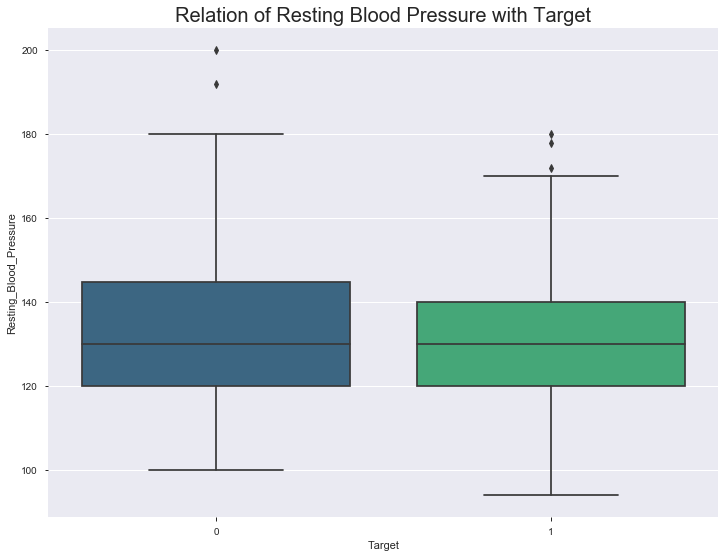

In [22]:
# NOT USED IN SLIDES

# resting_blood_pressure vs target

# Resting Blood Pressure, The above Bivariate plot between tresbps(the resting blood pressure of a patient), 
#and the target which says that whether the patient is suffering from the heart disease or not. The plot 
#clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater 
#blood pressure than the patients who have heart diseases.
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data_v1['Target'], data_v1['Resting_Blood_Pressure'], palette = 'viridis')
plt.title('Relation of Resting Blood Pressure with Target', fontsize = 20)
plt.show()

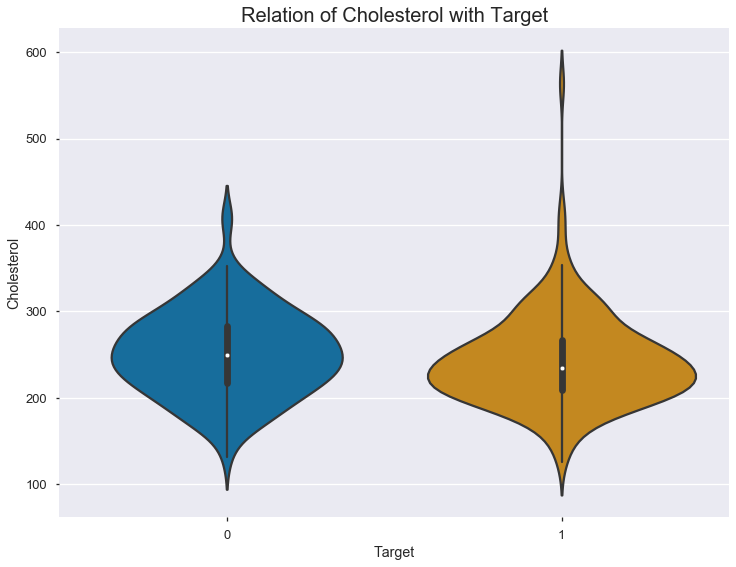

In [39]:
# cholesterol vs target

# The below Bivariate plot between cholestrol levels and target suggests that the Patients likely to suffer 
#from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to 
#not suffer from the heart diseases.

#Hence, we can infer from the above plot that the cholestrol levels plays an important role in determining 
#heart diseases. We all must keep our cholestrol levels in control as possible.
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data_v1['Target'], data_v1['Cholesterol'], palette = 'colorblind')
plt.title('Relation of Cholesterol with Target', fontsize = 20, fontweight = 30)
plt.show()

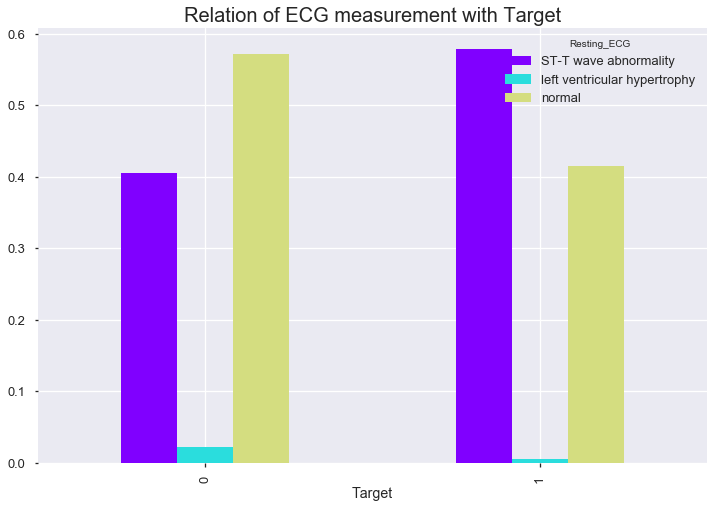

In [45]:
# Resting electrocardiographic measurement vs target

# The below plot is column bar chart representing target vs ECG Measurements(Electro Cardio Gram), The above 
#plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 
#0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.

plt.rcParams['figure.figsize'] = (12, 8)
dat = pd.crosstab(data_v1['Target'], data_v1['Resting_ECG']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

In [53]:
'''
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# Checking the relation between slope and target
plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(data_v1['Target'], data_v1['St_Slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()
'''

"\n# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)\n# Checking the relation between slope and target\nplt.rcParams['figure.figsize'] = (15, 9)\nsns.boxenplot(data_v1['Target'], data_v1['St_Slope'], palette = 'copper')\nplt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)\nplt.show()\n"

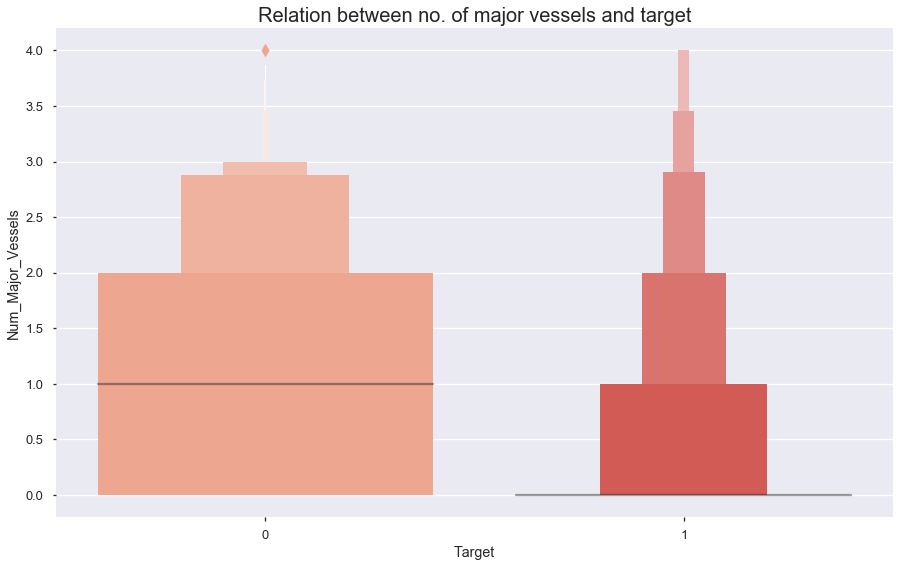

In [54]:
#ca: The number of major vessels (0-3)

# The below Bivariate plot between Target and Number of Major Vessels, shows that the patients who are 
#more likely to suffer from Heart diseases are having high values of Major Vessels wheras the patiets who are 
#very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

#Hence, It is also helpful in determining the heart diseases, the more the number of vessels, the more is 
#the chance of suffering from heart diseases.

sns.boxenplot(data_v1['Target'], data_v1['Num_Major_Vessels'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

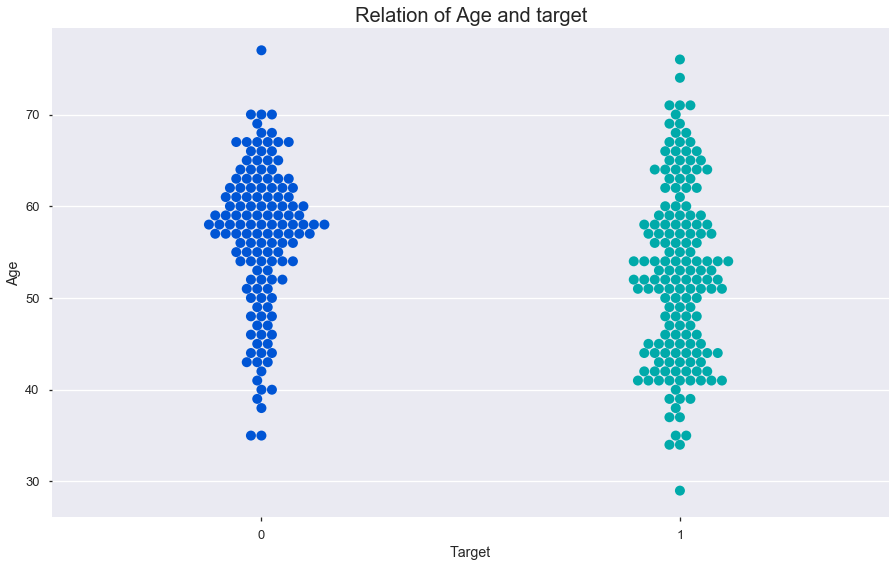

In [56]:
# relation between age and target

#From the below Swarm plot between the target and the age of the patients, we are not able to find any clue 
#or pattern, so age is not a very good attribute to determine the heart disease of a patient as a patient of 
#heart diseases range from 30-70, whereas it is not important that all of the people lying in that same age 
#group are bound to suffer from the heart diseases.

plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(data_v1['Target'], data_v1['Age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

Text(0.5, 1.0, 'Age vs Thalach')

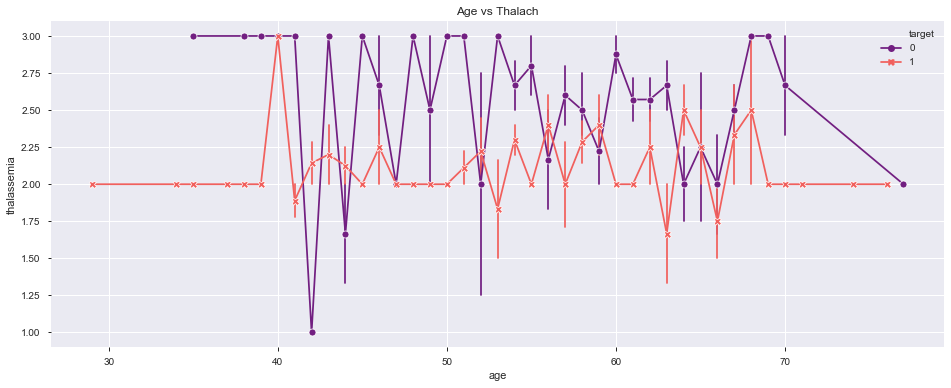

In [88]:
fig,ax=plt.subplots(figsize=(16,6))
sns.lineplot(y='thalassemia',x='age',data=data_v1,hue="target",style='target',palette='magma',markers=True, 
             dashes=False,err_style="bars", ci=68)
plt.title('Age vs Thalach')
#Thalach always high in people having heart disease and as age increases the thalach seems to reduce 
#and other factors might play a role in heart disease

Text(0.5, 1.0, 'slope of the peak exercise ST segment')

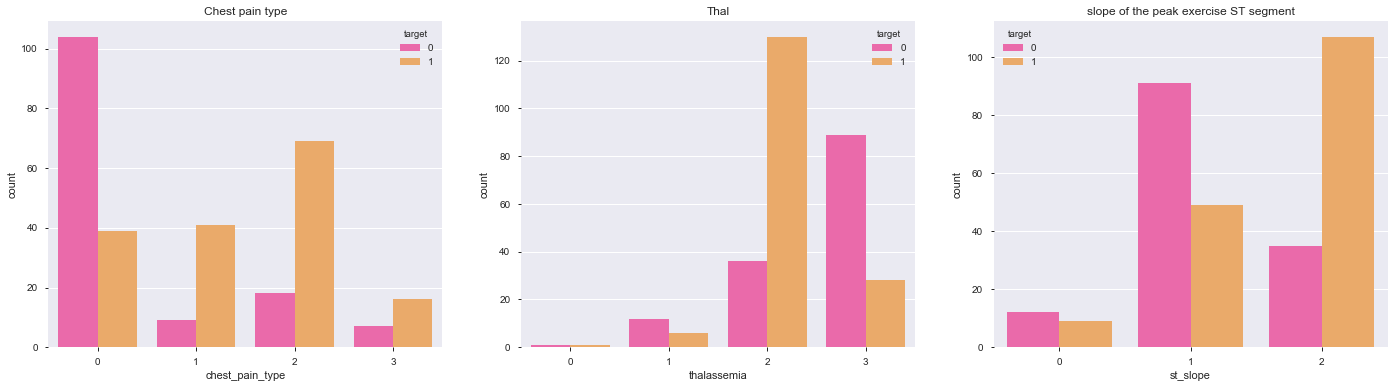

In [89]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(131)
x1=sns.countplot(x='chest_pain_type',data=data_v1,hue='target',palette='spring',linewidth=3)
x1.set_title('Chest pain type')
#Chest pain type 2 people have highest chance of heart disease

plt.subplot(132)
x2=sns.countplot(x='thalassemia',data=data_v1,hue='target',palette='spring',linewidth=3)
x2.set_title('Thal')
#People with thal 2 have the highest chance of heart disease

plt.subplot(133)
x3=sns.countplot(x='st_slope',data=data_v1,hue='target',palette='spring',linewidth=3)
x3.set_title('slope of the peak exercise ST segment')
#Slope 2 people have higher chance of heart disease

In [123]:
import plotly.express as px

tips = px.data.tips()
fig = px.parallel_categories(data_v1, dimensions=['exercise_induced_angina', 'thalassemia', 'target'],
                color="num_major_vessels", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'})
fig.show()

In [ ]:
data_v1.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
              'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 
              'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [65]:
# Creating temp data for data viz
d1=data_v1.groupby(['Sex', 'Age'])['Resting_Blood_Pressure'].max().reset_index(name ='Avg_Resting_Blood_Pressure').sort_values('Age').head(64)

figure = bubbleplot(dataset = d1.sort_values('Age'), 
                    x_column = 'Age', 
                    y_column = 'Avg_Resting_Blood_Pressure',
                    bubble_column = 'Sex', 
                    time_column = 'Age',
                    color_column = 'Sex',
                    
                    x_title = "Age", 
                    y_title = "Average Resting Blood Pressure",
                    title = '      Age vs Average Resting Blood Pressure vs Sex',
                    x_logscale = False, scale_bubble = 1, width=800, height = 400)

py.iplot(figure, config={'scrollzoom': True})

In [66]:
trace = go.Scatter3d(
    x = data_v1['Cholesterol'],y = data_v1['Resting_Blood_Pressure'],z = data_v1['Age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
    size = 10,
    color = data_v1['Age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Resting Blood Pressure vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Resting Blood Pressure'),
            zaxis = dict(title  = 'Age')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

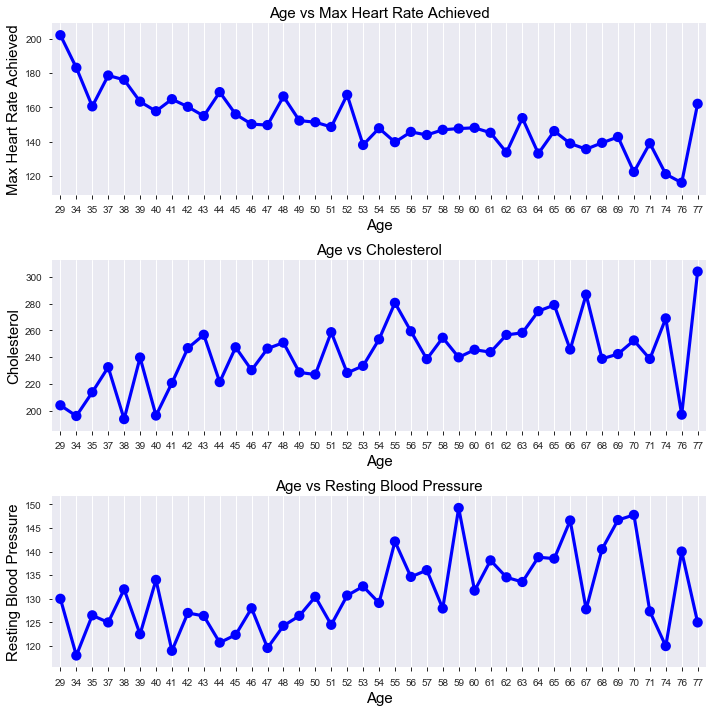

In [67]:
Age_unique=sorted(data_v1.Age.unique())
Age_max_heart_rate=data_v1.groupby('Age')['Max_Heart_Rate_Achieved'].count().values
mean_max_heart_rate=[]
for i,Age in enumerate(Age_unique):
    mean_max_heart_rate.append(sum(data_v1[data_v1['Age']==Age].Max_Heart_Rate_Achieved)/Age_max_heart_rate[i])

#data_sorted=data_v1.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.pointplot(x=Age_unique,y=mean_max_heart_rate,color='blue',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='black')
plt.xticks(rotation=0)
plt.ylabel('Max Heart Rate Achieved',fontsize = 15,color='black')
plt.title('Age vs Max Heart Rate Achieved',fontsize = 15,color='black')
plt.grid()

#Age_unique=sorted(data_v1.Age.unique())
Age_Cholesterol=data_v1.groupby('Age')['Cholesterol'].count().values
mean_Cholesterol=[]
for i,Age in enumerate(Age_unique):
    mean_Cholesterol.append(sum(data_v1[data_v1['Age']==Age].Cholesterol)/Age_Cholesterol[i])

plt.subplot(3,1,2)
sns.pointplot(x=Age_unique,y=mean_Cholesterol,color='blue',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='black')
plt.xticks(rotation=0)
plt.ylabel('Cholesterol',fontsize = 15,color='black')
plt.title('Age vs Cholesterol',fontsize = 15,color='black')
plt.grid()

Age_Resting_Blood_Pressure=data_v1.groupby('Age')['Resting_Blood_Pressure'].count().values
mean_Resting_Blood_Pressure=[]
for i,Age in enumerate(Age_unique):
    mean_Resting_Blood_Pressure.append(sum(data_v1[data_v1['Age']==Age].Resting_Blood_Pressure)/Age_Resting_Blood_Pressure[i])

plt.subplot(3,1,3)
sns.pointplot(x=Age_unique,y=mean_Resting_Blood_Pressure,color='blue',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='black')
plt.xticks(rotation=0)
#plt.xticks(np.arange(min(Age_unique), max(Age_unique)+1, 1))
#plt.xticks(np.arange(29, 100, 5)) 
plt.ylabel('Resting Blood Pressure',fontsize = 15,color='black')
plt.title('Age vs Resting Blood Pressure',fontsize = 15,color='black')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# splitting the sets into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

In [ ]:
# MODELLING
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values


export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')